# Curso de Inferância Causal

- Dependências:

In [1]:
import numpy as np
import statistics as st
import statsmodels as sm
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

# Aula 1 - Introdução à Inferência Causal

- Queremos estabelecer modelos genéricos a partir de situações restritas;

- Mostrar exemplos de como usamos estimações no dia-a-dia;
- Mostrar exemplos de como poderíamos validar uma máquina, em sua produção;
- Mostrar exemplo das eleições;
- Mostrar exemplo das vacinas;

- Problemas de superstições, conseguimos ver padrões em todo lugar, viéses;
    - Apofenia;

- Usar a ferramenta estatística para conseguir fazer inferência;
- Fugindo de viéses, vamos usar a inferência estatística para inferir comportamentos de uma população usando uma amostra;

- A inferência estatística, no fundo, é só uma maneira de manter nossas extrapolações sob controle;
- Métodos que nos permitem ter ideia do tamanho e validade das nossas extrapolações;

- Mostrar uma análise gráfica e perguntar se há diferença entre grupos;
- Mostrar uma outra análise gráfica mais difícil de enxergar a diferença;
- Temos que ter métodos mais sofisticados para dizermos que existem diferenças;

#### Conceitual de Inferência Estatistica

- Ferramenta para gerar conclusões sobre uma população a partir de uma amostra ruidosa;

- População: conjunto de todos os elementos ou resultados sob investigação;
- Amostra: qualquer subconjunto da população;

<hr>

![image](img/inferencia.JPG)

<hr>

- Estatísticas são funções, números extraídos da amostra;
- A estatística nos ajuda a extrapolar para uma população da qual nossa amostra seja representativa;
- Evidentemente vamos querer extrapolar os dados para outras populações que não temos como incluir na amostra;

<hr>

- Qual que é a chance de encontrar, pelo puro acaso, uma diferença entre as amostras mais extrema do que aquela que foi de fato encontrada? 

# Aula 2 - Estatísticas Descritivas - Estimação Sem Viés dos Parâmetros

- Estatística descritiva:
    - Tendência central:
        - Média;
        - Mediana;
        - Moda;
    - Espalhamento:
        - Amplitude;
        - Variância;
        - Desvio padrão;
        - Intervalo interquartil;

- As estatísticas amostrais estimam os parâmetros populacionais?

#### A média amostral é um bom estimador da média populacional?
$$\bar{x}= \frac{\sum_{i=1}^{n} x_i}{n} \xrightarrow{estima} \mu = \frac{\sum_{i=1}^{N} x_i}{N}$$

<hr>

- onde n é o tamanho amostral e N é o parâmetro populacional, tamanho da população;

-  Vamos realizar um exemplo/simulação:
    - Vamos pegar uma população:

In [2]:
# população
p = [1,2,3]

p = pd.Series(p)

In [3]:
# Média da população
p.mean()

2.0

- Vamos pegar uma amostra de dois elementos desta população e tirar a média:

In [4]:
tamanho_amostra = 2
quantidade_amostras = 10000

lista_media_amostras = []

for num_amostra in range(quantidade_amostras):
    # criando uma amostra de tamanho "tamanho_amostra" com reposição
    amostra = p.sample(n=tamanho_amostra, replace=True)
    media_amostra = amostra.mean()
    lista_media_amostras.append(media_amostra)

Text(0, 0.5, 'Frequência das Médias das Amostras')

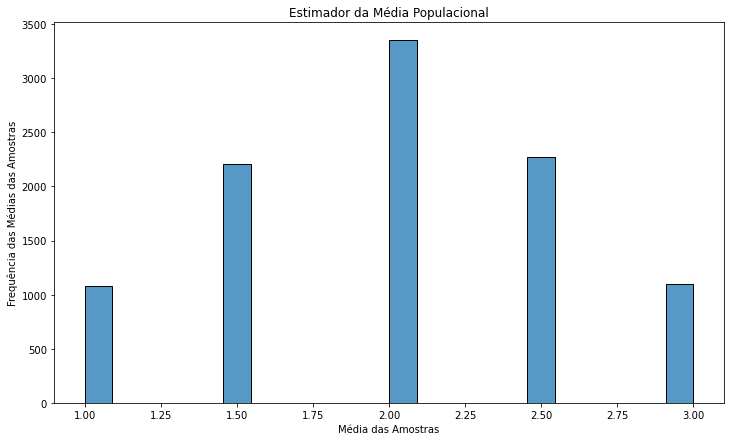

In [5]:
ax, fig = plt.subplots(nrows=1, ncols=1, figsize=(12,7))
ax = sb.histplot(lista_media_amostras)

ax.set_title("Estimador da Média Populacional")

ax.set_xlabel("Média das Amostras")
ax.set_ylabel("Frequência das Médias das Amostras")

#### A variância amostral é um bom estimador da variância populacional?
$$s^{2} = \frac{\sum_{i=1}^{n} (x_i-\bar{X})^{2}}{n} \xrightarrow{estima} \sigma^{2} = \frac{\sum_{i=1}^{N} (x_i-\mu)^{2}}{N}$$

<hr>

- onde n é o tamanho amostral e N é o parâmetro populacional, tamanho da população;

-  Vamos realizar um exemplo/simulação:
    - Vamos pegar uma população:

In [6]:
# população
p = [1,2,3]

p = pd.Series(p)

In [7]:
# Média da população
p.mean()

2.0

In [8]:
p.var(ddof=0)

0.6666666666666666

In [9]:
sum((p-p.mean())**2)/p.shape[0]

0.6666666666666666

- Vamos pegar uma amostra de dois elementos desta população e tirar a média:

In [10]:
tamanho_amostra = 2
quantidade_amostras = 1000

lista_var_amostras = []

for num_amostra in range(quantidade_amostras):
    # criando uma amostra de tamanho "tamanho_amostra" com reposição
    amostra = p.sample(n=tamanho_amostra, replace=True)
    var_amostra = amostra.var(ddof=0)
    lista_var_amostras.append(var_amostra)

Text(0, 0.5, 'Frequência das Variâncias das Amostras')

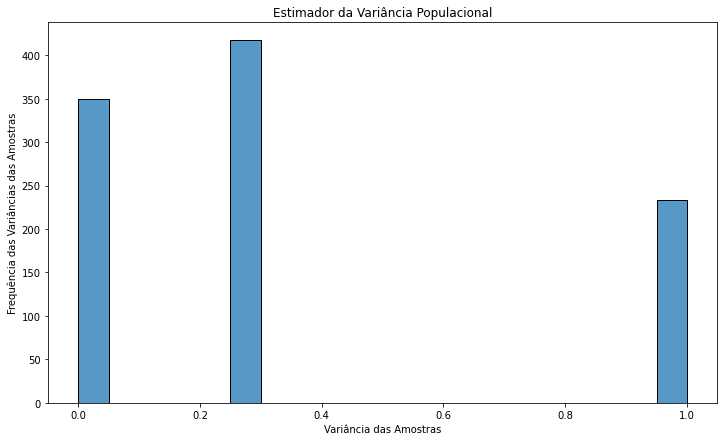

In [11]:
ax, fig = plt.subplots(nrows=1, ncols=1, figsize=(12,7))
ax = sb.histplot(lista_var_amostras)

ax.set_title("Estimador da Variância Populacional")

ax.set_xlabel("Variância das Amostras")
ax.set_ylabel("Frequência das Variâncias das Amostras")

- Parece que a variância amostral não estima a variância populacional:
    - É um estimador enviesado;

- Corrigindo esse viés, vamos agora usar o mesmo código mas variar o tamanho da amostra:

In [12]:
# população
p = [1,2,3]
p = pd.Series(p)

lista_valores = []
for tamanho_amostra in range(2,101,1):
    
    dictValores = {}
    
    dictValores['pop'] = p.size
    dictValores['tamanho_amostra'] = tamanho_amostra
    dictValores['quantidade_amostras'] = 10000
    dictValores['var_pop'] = p.var(ddof=0)

    lista_var_amostras = []
    for num_amostra in range(dictValores['quantidade_amostras']):
        # criando uma amostra de tamanho "tamanho_amostra" com reposição
        amostra = p.sample(n=tamanho_amostra, replace=True)
        var_amostra = amostra.var(ddof=0)
        lista_var_amostras.append(var_amostra)
    
    dictValores['var_amostra'] = pd.Series(lista_var_amostras).mean()
    dictValores['var_amostra/var_pop'] = round(dictValores['var_amostra']/dictValores['var_pop'],2)
    dictValores['(n-1)/n'] = round((tamanho_amostra-1)/tamanho_amostra,2)
    
    lista_valores.append(dictValores)
    
df_dados = pd.DataFrame(lista_valores)

In [13]:
df_dados.head(10)

,pop,tamanho_amostra,quantidade_amostras,var_pop,var_amostra,var_amostra/var_pop,(n-1)/n
0,3,2,10000,0.666667,0.328800,0.49,0.50
1,3,3,10000,0.666667,0.446711,0.67,0.67
2,3,4,10000,0.666667,0.498231,0.75,0.75
3,3,5,10000,0.666667,0.535952,0.80,0.80
4,3,6,10000,0.666667,0.554939,0.83,0.83
5,3,7,10000,0.666667,0.569188,0.85,0.86
6,3,8,10000,0.666667,0.585083,0.88,0.88
7,3,9,10000,0.666667,0.592783,0.89,0.89
8,3,10,10000,0.666667,0.599956,0.90,0.90
9,3,11,10000,0.666667,0.605932,0.91,0.91


In [14]:
df_dados.tail(10)

,pop,tamanho_amostra,quantidade_amostras,var_pop,var_amostra,var_amostra/var_pop,(n-1)/n
89,3,91,10000,0.666667,0.658856,0.99,0.99
90,3,92,10000,0.666667,0.660473,0.99,0.99
91,3,93,10000,0.666667,0.659414,0.99,0.99
92,3,94,10000,0.666667,0.659994,0.99,0.99
93,3,95,10000,0.666667,0.660076,0.99,0.99
94,3,96,10000,0.666667,0.659927,0.99,0.99
95,3,97,10000,0.666667,0.659474,0.99,0.99
96,3,98,10000,0.666667,0.659176,0.99,0.99
97,3,99,10000,0.666667,0.660459,0.99,0.99
98,3,100,10000,0.666667,0.660833,0.99,0.99


- A correção aplicada é:
$$s^{2} = \frac{n-1}{n} \sigma^{2} = \frac{\sum_{i=1}^{n} (x_i-\bar{X})^{2}}{n-1} \xrightarrow{estima} \sigma^{2} = \frac{\sum_{i=1}^{N} (x_i-\mu)^{2}}{N}$$

<hr>

# Aula 3 - Teorema Central do Limite - Captando a lei natural da aleatoridade

- Vamos fazer uma simulação:
    - Usando uma moeda não viciada;
    - 0 = coroa;
    - 1 = cara;

In [18]:
lanca_moeda = [0,1]

lanca_moeda = pd.Series(lanca_moeda)

In [19]:
lanca_moeda.mean()

0.5

In [20]:
lanca_moeda.std(ddof=1)

0.7071067811865476

- Vamos fazer vários lançamentos:

In [21]:
lancamentos = 1000

lista_lancamentos = []
lista_lancamentos_media = []
lista_lancamentos_var = []
lista_diff_cara_coroa = []

for lancamento in range(1,lancamentos,1):
    
    lista_lancamentos.append(lanca_moeda.sample(n=1, replace=True).iat[0])
    lista_lancamentos_media.append(np.mean(lista_lancamentos))
    lista_lancamentos_var.append(np.var(lista_lancamentos))
    
    contagem = pd.value_counts(lista_lancamentos)
    num_cara = contagem.get(1, 1)
    num_coroa = contagem.get(0, 0)

    lista_diff_cara_coroa.append(num_cara/(num_cara+num_coroa))

(-0.25, 1.5)

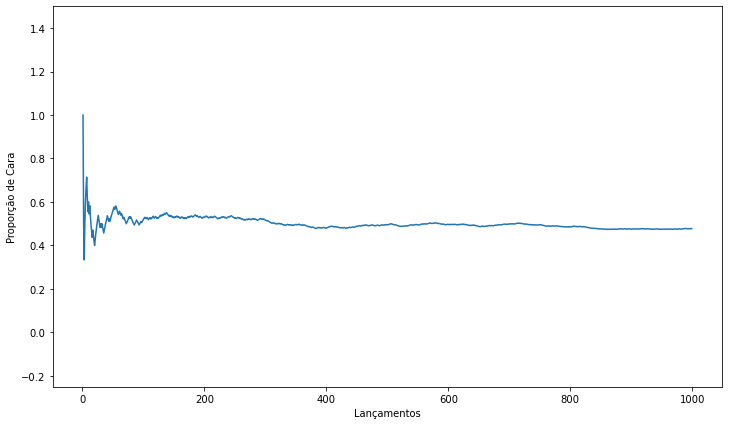

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,7))

ax.plot(list(range(1,lancamentos,1)), lista_diff_cara_coroa)
ax.set_xlabel('Lançamentos')
ax.set_ylabel('Proporção de Cara')
ax.set_ylim(-0.25, 1.5)

- Parece que a proporção converge para 50%;
- Mas se fizermos isso mais vezes;

- Realizando mais experimentos de lançamentos;

In [23]:
experimentos = 10
lista_experimentos = []

for experimento in range(1, experimentos, 1):

    lancamentos = 1000

    lista_lancamentos = []
    lista_lancamentos_media = []
    lista_lancamentos_var = []
    lista_diff_cara_coroa = []

    for lancamento in range(1,lancamentos,1):

        lista_lancamentos.append(lanca_moeda.sample(n=1, replace=True).iat[0])
        lista_lancamentos_media.append(np.mean(lista_lancamentos))
        lista_lancamentos_var.append(np.var(lista_lancamentos))

        contagem = pd.value_counts(lista_lancamentos)
        num_cara = contagem.get(1, 1)
        num_coroa = contagem.get(0, 0)

        lista_diff_cara_coroa.append(num_cara/(num_cara+num_coroa))
    
    lista_experimentos.append(lista_diff_cara_coroa)

(-0.25, 1.5)

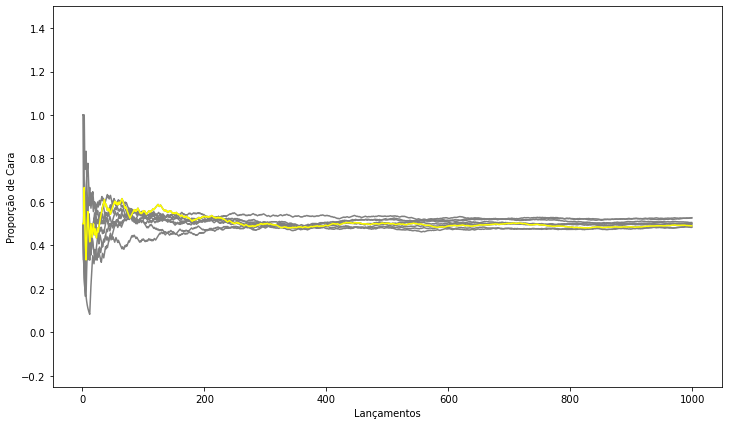

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,7))

for experimento in lista_experimentos:
    ax.plot(list(range(1,lancamentos,1)), experimento, c='gray')
    
ax.plot(list(range(1,lancamentos,1)), lista_diff_cara_coroa, c='yellow')
    
ax.set_xlabel('Lançamentos')
ax.set_ylabel('Proporção de Cara')
ax.set_ylim(-0.25, 1.5)

- Em todos os experimentos que fazemos sempre converge para 50%;

#### Essa é a lei das médias: a medida que n aumenta, o número médio de caras se aproxima mais e mais da média populaciopnal;

- A média amostral $\bar{x}$ (uma estatística) converge para a média populacional $\mu$ (um parâmetro);

- Vamos fazer um outro experimento:
    - Vamos variar a quantidade de lançamentos e validar observar a média e o desvio;

In [73]:
moeda = [0,1]

moeda = pd.Series(moeda)

In [74]:
moeda.mean()

0.5

In [77]:
moeda.std(ddof=0)

0.5

- Vamos fazer vários lançamentos:

In [101]:
num_lancamentos = [1, 2, 4, 9, 25, 50, 100]
lista_experimentos = []

num_amostras = 5000

for lancamentos in num_lancamentos:
    
    # vamos repetir o lançamento das moedas abaixo em num_amostras de mesmo tamanho
    lista_mean_amostras = []
    lista_std_amostras = []
    for n_amostra in range(num_amostras):
        
        # Abaixo é realizado o lançamento de moedas, para lance vezes
        lista_lancamentos = [] 
        for lance in range(lancamentos):
            lancei_moeda = moeda.sample(n=1, replace=True).iat[0]
            lista_lancamentos.append(lancei_moeda)
        lista_mean_amostras.append(np.mean(lista_lancamentos))

    dict_amostra = {"num_lancamentos":[lancamentos for _ in lista_mean_amostras],
                    "media_amostra":lista_mean_amostras}
    
    lista_experimentos.append(pd.DataFrame(dict_amostra))

df_simula = pd.concat(lista_experimentos)
df_simula.fillna(0, inplace=True)

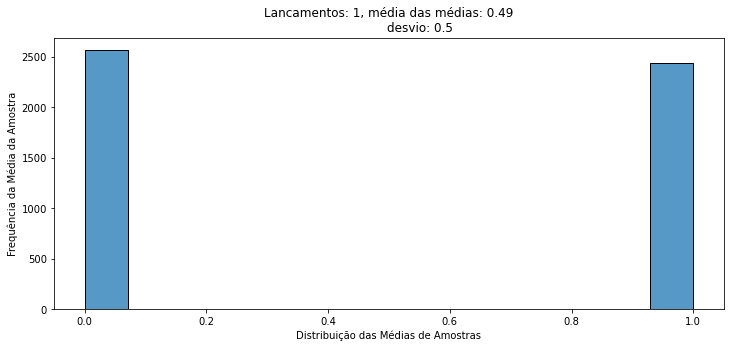

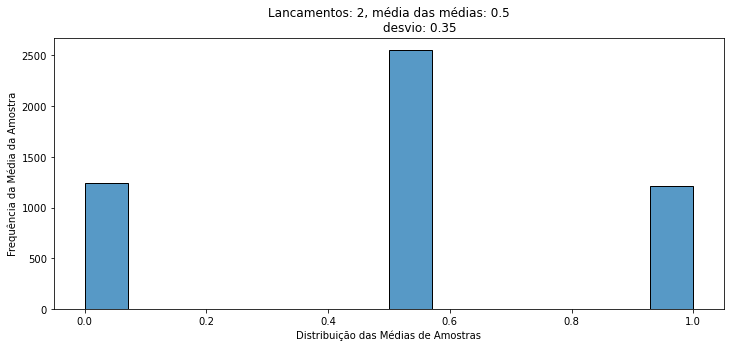

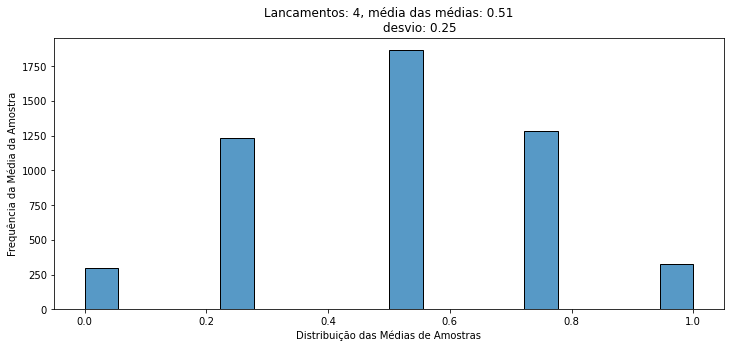

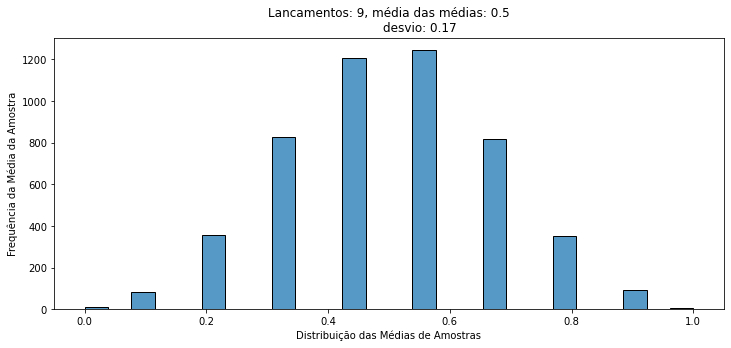

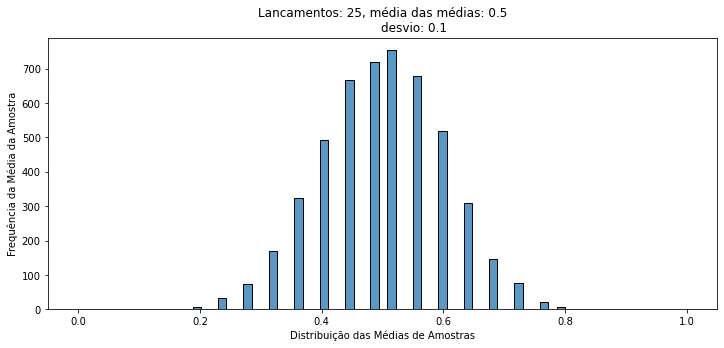

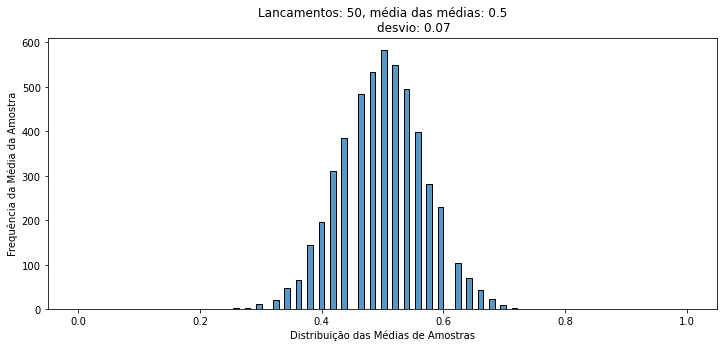

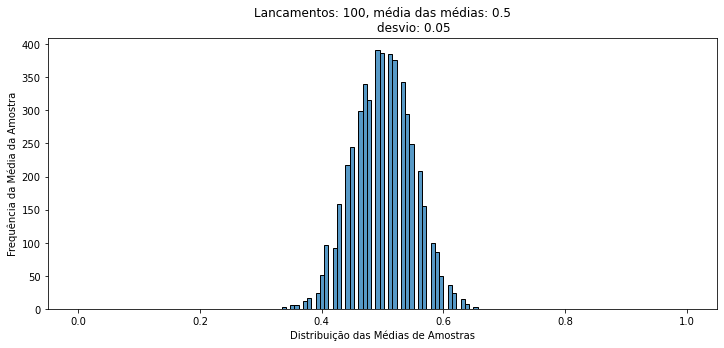

In [102]:
for i, lancamentos in enumerate(num_lancamentos):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
    
    filtro = (df_simula.num_lancamentos==lancamentos)
    sb.histplot(data=df_simula.loc[filtro], x="media_amostra", ax=ax)
    
    titulo = f"""Lancamentos: {str(lancamentos)}, média das médias: {round(df_simula.loc[filtro].media_amostra.mean(),2)}
                desvio: {round(df_simula.loc[filtro].media_amostra.std(),2)}"""
    
    
    ax.set_title(titulo)
    ax.set_xlabel('Distribuição das Médias de Amostras')
    ax.set_ylabel('Frequência da Média da Amostra')
    ax.set_xlim(-0.05, 1.05)

- Conforme aumentamos o tamanho das amostras, a média se estabiliza, em outras palavras, a média das amostras $\bar{x}$ converge para a média populaciona $\mu$;
- Quanto maior é o tamanho da amostra, menor é a média dos desvios das amostras e a curva se aproxima de um formato gaussiano, isto é, mais normal fica a distribuição;

- Vamos entender melhor o desvio, vamos ver como ele vai variando conforme variamos o tamanho da amostra:
    - Vamos variar o tamanho da amostra de 1 até 500;

In [106]:
num_lancamentos = [1,2,4,8,16,32,64,128,256,512]
lista_experimentos = []

num_amostras = 100

for lancamentos in num_lancamentos:
    
    # vamos repetir o lançamento das moedas abaixo em num_amostras de mesmo tamanho
    lista_mean_amostras = []
    lista_std_amostras = []
    for n_amostra in range(num_amostras):
        
        # Abaixo é realizado o lançamento de moedas, para lance vezes
        lista_lancamentos = [] 
        for lance in range(lancamentos):
            lancei_moeda = moeda.sample(n=1, replace=True).iat[0]
            lista_lancamentos.append(lancei_moeda)
        lista_mean_amostras.append(np.mean(lista_lancamentos))

    dict_amostra = {"num_lancamentos":lancamentos,
                    "media_medias_amostras":np.mean(lista_mean_amostras),
                    "desvio_medias_amostras":np.std(lista_mean_amostras, ddof=1)}
    
    lista_experimentos.append(dict_amostra)

df_simula = pd.DataFrame(lista_experimentos)
df_simula.fillna(0, inplace=True)

In [107]:
df_simula.head()

,num_lancamentos,media_medias_amostras,desvio_medias_amostras
0,1,0.470000,0.501614
1,2,0.455000,0.348844
2,4,0.482500,0.259309
3,8,0.510000,0.171041
4,16,0.489375,0.118204


(-0.05, 1.05)

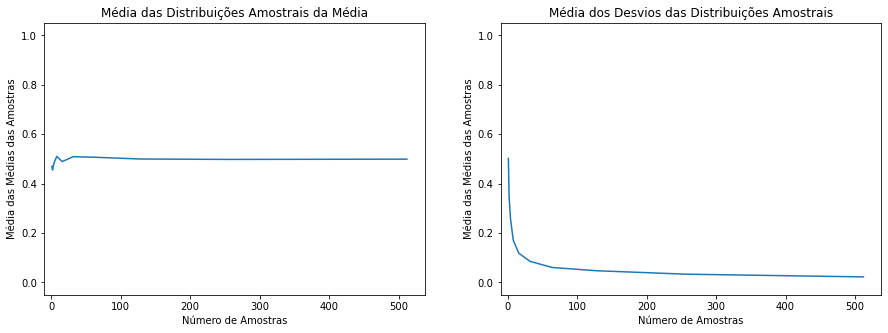

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Comportamento da Média
ax[0].plot(df_simula.num_lancamentos.tolist(),
        df_simula.media_medias_amostras.tolist())

ax[0].set_title("Média das Distribuições Amostrais da Média")

ax[0].set_xlabel("Número de Amostras")
ax[0].set_ylabel("Média das Médias das Amostras")

ax[0].set_xlim(-10, np.max(num_lancamentos)*1.05)
ax[0].set_ylim(-0.05, 1.05)

# Comportamento do Desvio
ax[1].plot(df_simula.num_lancamentos.tolist(),
        df_simula.desvio_medias_amostras.tolist())

ax[1].set_title("Média dos Desvios das Distribuições Amostrais")

ax[1].set_xlabel("Número de Amostras")
ax[1].set_ylabel("Média das Médias das Amostras")

ax[1].set_xlim(-10, np.max(num_lancamentos)*1.05)
ax[1].set_ylim(-0.05, 1.05)

- O desvio ele vai caindo e até se estabilizar. A relação de queda do desvio das amostras é dada pela seguinte expressão:$$\frac{\sigma}{\sqrt{n}}$$

#### Teorema central do limite: com o aumento do tamanho da amostra, a distribuição das médias segue uma curva normal;

$$\mu\bar{x}\cong\mu$$

$$\sigma\bar{x}\cong\frac{\sigma}{\sqrt{n}}$$ Trata-se do erro padrão ou desvio padrão da média.

- Central: se refere a um teorema funcamental;
- Limite: se refere a emergência da normalidade quando vamos para o limite;

- O nosso:
$$\bar{x}\cong\mu$$

$$\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{N}}\cong\frac{S}{\sqrt{n}}$$

-----------

- Beleza, segue uma distribuição gaussiana, porém o que é uma distribuição gaussiana?
    - Propriedades;
    - Aonde surgiu;

- Como trabalhar com as gaussianas?
    - Transfroamção;

-----------

# Aula 4 - Intervalo de Confiança

- Estimativa da estatística e da incerteza associada a essa estatística;
- Veremos um intervalo de valores que cobrem a média populacional com certa probabilidade;
- Dar exemplos:
    - Não queremos intervalos muito grandes e nem muito curtos (pois será que teremos precisão)?

- Para criar um intervalo de confiança, vamos usar o conhecimento aprendido nas aulas passadas:
<hr>
$$\bar{x}= \frac{\sum_{i=1}^{n} x_i}{n} \xrightarrow{estima} \mu = \frac{\sum_{i=1}^{N} x_i}{N}$$
<hr>
$$s^{2} = \frac{\sum_{i=1}^{n} (x_i-\bar{X})^{2}}{n-1} \xrightarrow{estima} \sigma^{2} = \frac{\sum_{i=1}^{N} (x_i-\mu)^{2}}{N}$$
<hr>
$$\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{N}}\cong\frac{S}{\sqrt{n}}$$
<hr>

- Vamos fazer uma simulação:
    - Imagine que você quer saber a média das notas do ENEM;
    - Porém, você só tem em mãos uma distribuição:
        - Um tamanho de amostra de $n=100$;
- Você não conhece a sua população:
    - Porém, para efeito de simulação, sabemos que a $\mu=700$ e $\sigma=10$;
- Vamos gerar a distribuição da população e essa distribuição que temos em mãos;


##### Nossa população:

In [349]:
media_pop = 700
desvio_pop = 10
tamanho_populacao = 1000000

# gerando a curva normal
dist_normal_pop = sp.stats.norm(loc=media_pop, scale=desvio_pop)

In [350]:
# gerando elementos randômicos da curva normal
populacao = dist_normal_pop.rvs(size=tamanho_populacao, random_state=32)

In [351]:
populacao[0:10]

array([696.51105549, 709.83703433, 705.80922831, 700.70284441,
       707.77532676, 705.81958745, 714.71790527, 716.63181009,
       697.38822879, 693.11323187])

In [352]:
populacao.mean()

700.0084393914804

In [353]:
populacao.std(ddof=1)

9.999492199168749

- Vamos desenhar essa distribuição:

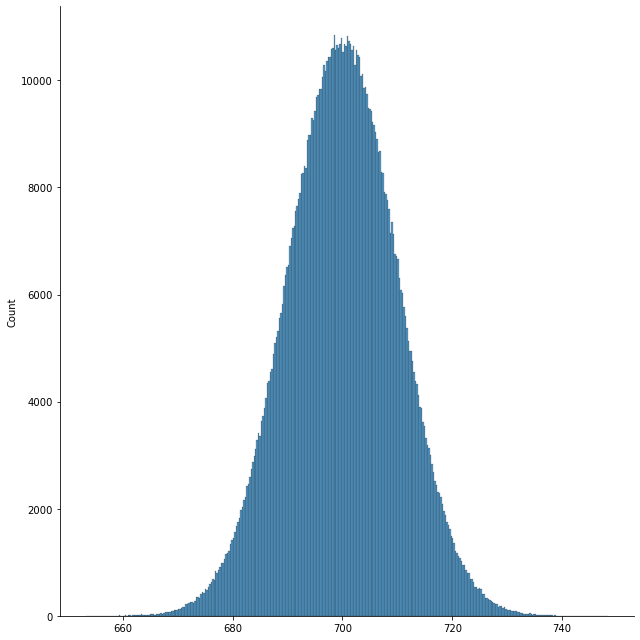

In [354]:
ax = sb.displot(x=populacao, kind='hist', height=9)

##### A amostra que temos em mãos:

In [385]:
media_amostra = 705
tamanho_amostra = 100
desvio_amostra = 100/np.sqrt(tamanho_amostra)

dist_normal_amostra = sp.stats.norm(loc=media_amostra, scale=desvio_amostra)
amostra_populacao = dist_normal_amostra.rvs(size=tamanho_amostra, random_state=32)
amostra_populacao = pd.Series(amostra_populacao)

In [386]:
amostra_populacao[0:10].values

array([701.51105549, 714.83703433, 710.80922831, 705.70284441,
       712.77532676, 710.81958745, 719.71790527, 721.63181009,
       702.38822879, 698.11323187])

In [387]:
amostra_populacao.mean()

705.6368595578466

In [388]:
amostra_populacao.std(ddof=1)

10.33760567576605

- Vamos desenhar essa distribuição:

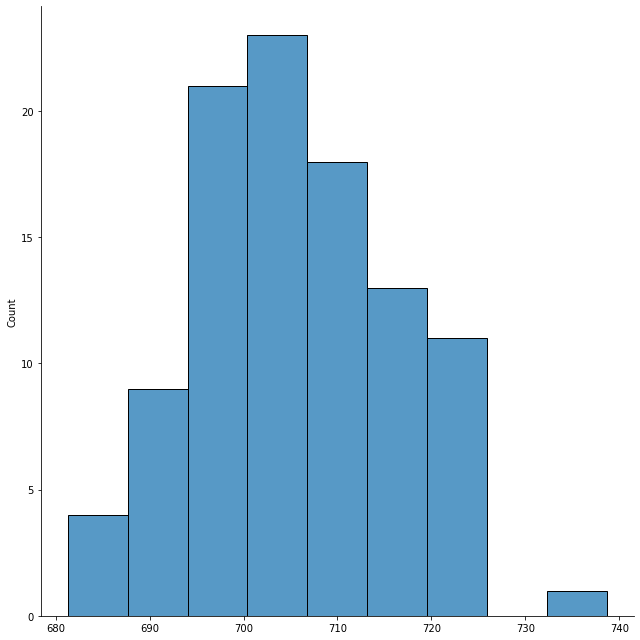

In [389]:
ax = sb.displot(x=amostra_populacao, kind='hist', height=9)

##### Agora queremos criar um intervalo de confiança sobre a nossa média de amostra que contenha a média da nossa população:

- Agora vamos fazer:
    - 100 amostras com reposição sob a amostra que temos em mãos;
    - Assumindo um desvio padrão pra cima e pra baixo como intervalo de confiança;

In [392]:
n_amostras = 100

lista_experimento = []
for n_amostra in range(1, n_amostras+1, 1):
    reamostra = amostra_populacao.sample(n=tamanho_amostra, replace=True)
    
    dict_experimento = {"n_amostra":n_amostra,
                        "media_amostra":reamostra.mean(),
                        "limite_superior":reamostra.mean()+reamostra.std(ddof=1),
                        "limite_inferior":reamostra.mean()-reamostra.std(ddof=1)}
    lista_experimento.append(dict_experimento)
    
df_experimentos = pd.DataFrame(lista_experimento)

df_experimentos.head()

,n_amostra,media_amostra,limite_superior,limite_inferior
0,1,703.926892,714.165129,693.688655
1,2,705.532132,716.511269,694.552996
2,3,704.353047,714.848366,693.857728
3,4,704.095651,713.476247,694.715056
4,5,706.305172,716.764699,695.845645


(690.0, 730.0)

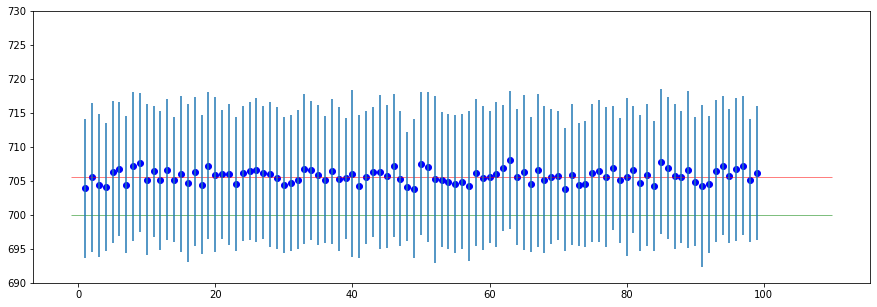

In [393]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

# média amostral
ax.hlines(y=amostra_populacao.mean(), xmin=-1, xmax=n_amostras*1.1, linewidth=0.5, color='r')

# média populacional
ax.hlines(y=populacao.mean(), xmin=-1, xmax=n_amostras*1.1, linewidth=0.5, color='g')

for n_amostra in range(1, n_amostras, 1):
    
    df_experimento = df_experimentos.loc[(df_experimentos.n_amostra==n_amostra)]
    
    ax.vlines(x=n_amostra,
              ymin=df_experimento.limite_inferior.iat[0],
              ymax=df_experimento.limite_superior.iat[0])
    
    ax.scatter(n_amostra,
               df_experimento.media_amostra.iat[0], c='blue')
    
ax.set_ylim(690,730)

#### Regra geral para intervalos de confiança, quando $\sigma$ é conhecido: $$IC_{p}=\bar{x}\pm z \frac{\sigma}{\sqrt{n}}$$

Em que:
- $p$ é a porcentagem desejada de intervalos que contenham $\mu$;
- $z$ é o valor de $z$ da distribuição da curva normal padrão tal que $P(-z< X < z)=p$;

##### Passos:
- 1) Ter sua amostra e ter $\sigma$ da população;
- 2) Calcular o erro padrão, $\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{N}}$;
- 3) Calcula a melhor estimativa da média populacional que é a média amostral: $\bar{x}= \frac{\sum_{i=1}^{n} x_i}{n} \xrightarrow{estima} \mu = \frac{\sum_{i=1}^{N} x_i}{N}$;
- 4) Da curva normal, obtenha os valores de $z$ que delimitam a área correspondente ao nível de confiança desejado ($0.95$):
- 5) Descreve o intervalo de confiança: $IC_{p}=\bar{x}\pm z \frac{\sigma}{\sqrt{n}}$;

##### Acima está os passos quando sabemos a variância, e quando não sabemos?
- Se $\sigma$ for desconhecido e $n$ for grande:
    - Podemos usar uma estimativa para $\sigma$ via amostra, $s$ em $s^{2} = \frac{\sum_{i=1}^{n} (x_i-\bar{X})^{2}}{n-1} \xrightarrow{estima} \sigma^{2} = \frac{\sum_{i=1}^{N} (x_i-\mu)^{2}}{N}$;
    - Continuamos usando a aproximação normal, z-score da tabela gaussiana;
- E se $n$ for pequeno? $$IC_{p}=\bar{x}\pm t_{p,gl=(n-1)} \frac{\sigma}{\sqrt{n}}$$
    - Quando $\sigma$ é desconhecido e $n$ é pequeno, nós usamos a distribuição $t$;
    - A distribuição $t$ se aproxima muito da normal, só que tem uma maior densidade de probabilidade nas caldas;
    - Com n menor do que 30, você deve usar a distribuição t;
        - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t
    - Use sempre a t, independente do tamanho da amostra;
    - Passos:
        - 1) Computar o erro padrão da $\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{N}}\cong\frac{S}{\sqrt{n}}$;
        - 2) Calcular o valor da distribuição t para o nível de confiança necessário;
            - Ex: $t_{p=0.95,gl=(n-1)}=?$

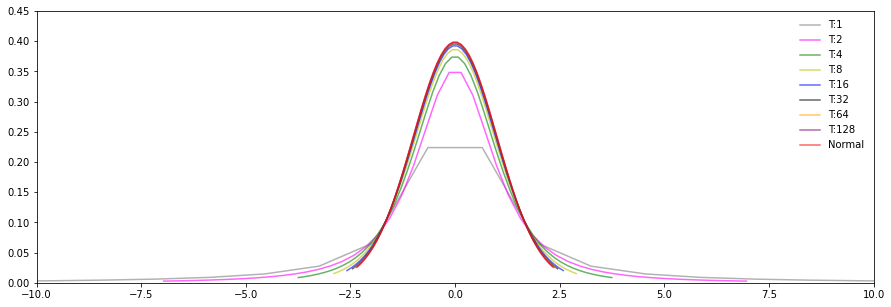

In [409]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))



graus_liberdade = [1,2,4,8,16,32,64,128]
graus_lib_cores = ['gray','magenta','g','y','b','black','orange','purple']

for i, grau_liberdade in enumerate(graus_liberdade):
    
    distribuicao_t = sp.stats.t(df=grau_liberdade,loc=0, scale=1)
    
    x = np.linspace(distribuicao_t.ppf(0.01), distribuicao_t.ppf(0.99))

    ax.plot(x, distribuicao_t.pdf(x),
            c=graus_lib_cores[i],
            alpha=0.6,
            label=f'T:{str(grau_liberdade)}')

distribuicao_normal = sp.stats.norm(loc=0, scale=1)
x = np.linspace(distribuicao_normal.ppf(0.01), distribuicao_normal.ppf(0.99))
ax.plot(x, distribuicao_normal.pdf(x),
        c='r',
        alpha=0.6,
        label=f'Normal')

ax.set_xlim(-10,10)
ax.set_ylim(0,0.45)
ax.legend(loc='best', frameon=False)

#### Interpretando intervalos de confiança:
- Se você repetir este experimento muitas vezxes, repetindo também o procedimento de cálculo para obter o intervalo de confiança 95%, espera-se que 95% dos intervalos irão cobrir a "verdadeira" média $\mu$ da população;
- Intervalos de confiança são construídos para conterem $\mu$ em uma fração dada de repetições;
    - Não significa que nós sabemos aonde está o $\mu$;

#### Podemos fazer todo o processo acima, baseada em teoria, usando somente a técnica de amostragem bootstrap;

- Passos:
    - 1) Reamostra os dados observados com reposição;
    - 2) Calcula a estatística de interesse;
    - 3) Repete muitas vezes (n>=10000);
    - 4) Computa os percentis do início e fim do intervalo;
    
- É uma chave mestra que funciona para estimar qualquer estatística (com ou sem viés) e para qualquer tipo de n;

# Aula 5 - Teste de Hipótese

- Se tivermos uma população, se extrairmos uma amostra de tamanho $n$, média $\bar{x}$ e desvio $s$, sabemos que esta amostra vai seguir:

$$\bar{x}= \frac{\sum_{i=1}^{n} x_i}{n} \xrightarrow{estima} \mu = \frac{\sum_{i=1}^{N} x_i}{N}$$
<hr>
$$s^{2} = \frac{\sum_{i=1}^{n} (x_i-\bar{X})^{2}}{n-1} \xrightarrow{estima} \sigma^{2} = \frac{\sum_{i=1}^{N} (x_i-\mu)^{2}}{N}$$
<hr>
$$\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{N}}\cong\frac{S}{\sqrt{n}}$$
<hr>

- Podemos usar a distribuição das médias amostrais para estimar a probabilidade da média estar em alguma região;

- Queremos distinguir quando um resultado é por acaso/aleatoriedade ou quando um resultado não é por acaso/aleatoriedade, que de fato existe algum comportamento fora da aleatoriedade;

- Precisamos definir um limiar, aonde dizemos que é por acaso e aonde dizemos que é por algum efeito diferente da aleatoriedade;

- Então queremos testar quando um resultado é por o mero acaso:
    - Hipótese nula;
- Ou quando o resultado não é por mero acaso e o resultado parece muito incomum para ser por mero acaso:
    - Hipótese alternativa;

- Situação:
    - Notas do ENEM seguem distribuição normal com $\mu=600$ e $\sigma=100$;
    - Uma empresa afirma que seu curso aumenta as notas no ENEM, pois os 100 alunos do curso tiveram média $\bar{x}=618$;
    - Vamos testar esta afirmação?
- Hipótese nula: mero acaso
    - As médias do ENEM de quem faz e não faz curso são iguais: $\mu = \bar{x}$;
- Hipótese alternativa:
    - As médias do ENEM de quem faz e não faz curso são diferentes: $\mu \neq \bar{x}$ (bicaudal) ou de que $\mu \leq \bar{x}$ (unicaudal);

#### Teste de Hipótese:

- Passo 1: estruturar a hipótese nula ou $H_{0}$;
- Passo 2: estruturar a hipótese alternativa ou $H_{a}$;
    - Pode ser "unicaudal" ou "direcional";
    - Pode ser "bicaudal" ou "não-direcional";
- Passo 3: estruturar a distribuição caso $H_{0}$;
- Passo 3.1: estruturar a distribuição caso $H_{a}$, caso seja possível;
- Passo 4: identificar regiões em que "aceita" ou "rejeita" $H_{0}$;
    - Usamos o nível de significância ($0.05$) para isso alfa $\alpha$ do seu teste;
    - Quando usamos um alfa estamos assumindo que temos um erro, o erro tipo 1, taxa de falso positivo;
        - Trata-se do erro de rejeitarmos a hipótese nula quando ela é verdadeira;
        - Se a hipótese nula for verdadeira, e replicarmos este experimento múltiplas vezes, experamos resultados na região de rejeição em 5% "alfa" dos casos;
- Passo 5: conduzir o "teste de significância da hipótese nula";
    - Nossa evidência empírica cai na área de aceitação ou rejeição?
    - Vamos olhar para o valor da estatística e ver se cai entre nossa região delimitada pelos valores críticos;

- Vamos construir a distribuição nula:

In [459]:
from scipy import stats

In [423]:
media_pop = 600
desvio_pop = 100
erro_padrao = 10

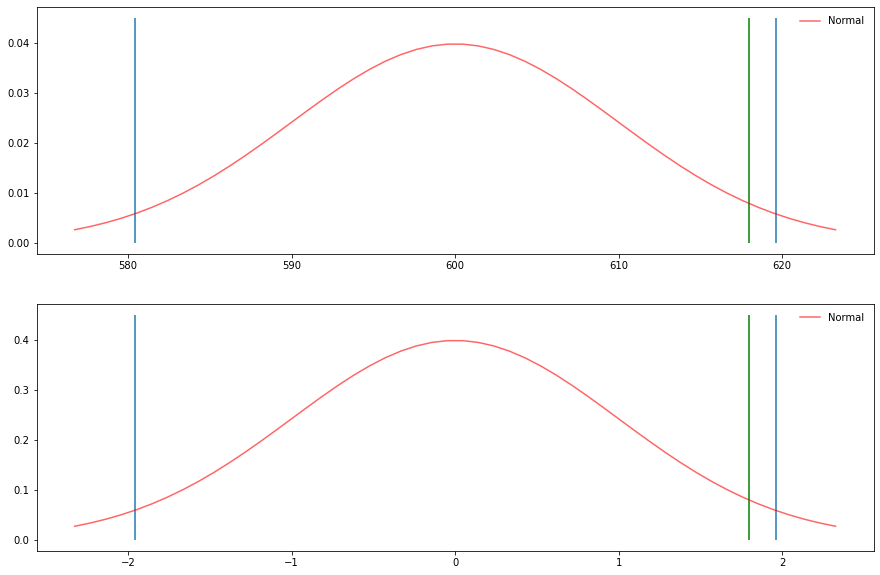

In [439]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

# hipótese nula na escala de notas do ENEM
distribuicao_normal = sp.stats.norm(loc=media_pop, scale=erro_padrao)
x = np.linspace(distribuicao_normal.ppf(0.01), distribuicao_normal.ppf(0.99))
ax[0].plot(x, distribuicao_normal.pdf(x),
        c='r',
        alpha=0.6,
        label=f'Normal')

ax[0].legend(loc='best', frameon=False)
ax[0].vlines(x=[580.4,619.6], ymin=0, ymax=0.045)
ax[0].vlines(x=618, ymin=0, ymax=0.045, color='g')

# hipótese nula na escala de erro padrão
distribuicao_normal = sp.stats.norm(loc=0, scale=1)
x = np.linspace(distribuicao_normal.ppf(0.01), distribuicao_normal.ppf(0.99))
ax[1].plot(x, distribuicao_normal.pdf(x),
        c='r',
        alpha=0.6,
        label=f'Normal')

ax[1].legend(loc='best', frameon=False)
ax[1].vlines(x=[-1.96,1.96], ymin=0, ymax=0.45)
ax[1].vlines(x=(618-media_pop)/erro_padrao, ymin=0, ymax=0.45, color='g')

- Com as informações acima, acitamos $H_{0}$;

- Vamos calcular o p-valor:

In [483]:
z = (618-600)/10
p_value = (1-stats.norm.cdf(z,loc=0, scale=1))
p_value, 2*p_value # multiplica por dois pois é bicaudal

# Qual que é a chance de encontrar, pelo puro acaso, uma diferença entre as amostras 
# mais extrema do que aquela que foi de fato encontrada?

(0.03593031911292577, 0.07186063822585154)

In [465]:
# Calcula o z-score crítico para a probabilidade de interesse
prob_1 = .025
prob_2 = .975

z_crit1 = stats.norm.ppf(prob_1, loc=0, scale=1)
z_crit2 = stats.norm.ppf(prob_2, loc=0, scale=1)

z_crit1, z_crit2

(-1.9599639845400545, 1.959963984540054)

In [470]:
# Calcula a probabilidade associada a um z-score
prob_z_crit_1 = stats.norm.cdf(z_crit1,loc=0, scale=1)
prob_z_crit_2 = stats.norm.cdf(z_crit2,loc=0, scale=1)

prob_z_crit_1, prob_z_crit_2, (prob_z_crit_2-prob_z_crit_1) # Calculando a área debaixo da curva

(0.024999999999999977, 0.975, 0.95)

#### Entrando na definição do que é erro tipo 2: falsos negativos
- É o erro de dizer que a hipótese nula é verdadeira quando ela não é;
- Ou é dizer que a hipótese alternativa não é verdadeira quando na realidade ela é;

#### Atualizar gráfico:
- Automatizar para duas teste AB;

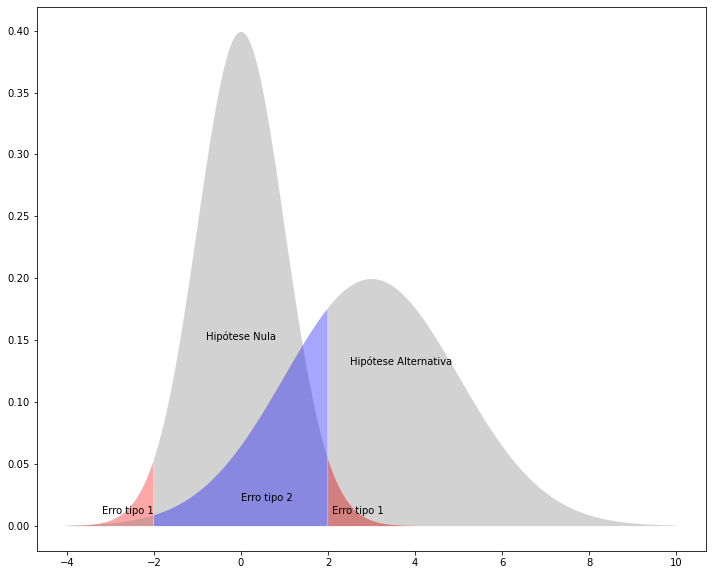

In [476]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Hipótese Nula")
plt.text(x=2.5, y=0.13, s= "Hipótese Alternativa")
plt.text(x=2.1, y=0.01, s= "Erro tipo 1")
plt.text(x=-3.2, y=0.01, s= "Erro tipo 1")
plt.text(x=0, y=0.02, s= "Erro tipo 2");